In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [4]:
reviews =  pd.read_csv('MovieReviewTrainingDatabase.csv')
reviews.isnull().values.any()
reviews.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


In [6]:
reviews['review'][3]

"It must be assumed that those who praised this film ('the greatest filmed opera ever,' didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.  It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is 'about' should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner's text, decided that Parsifal is 'about' bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we get a double dose of Armin Jo

<AxesSubplot:xlabel='sentiment', ylabel='count'>

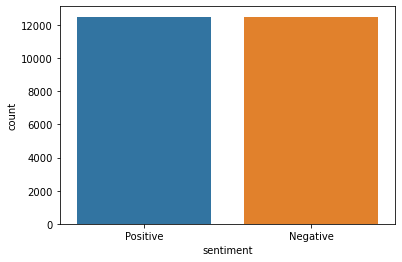

In [9]:
import seaborn as sns
sns.countplot(x='sentiment', data=reviews)

In [10]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [11]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [12]:
procesado=[]
for i in reviews['review']:
    procesado.append(preprocess_text(i))

In [15]:
procesado[3]


'It must be assumed that those who praised this film the greatest filmed opera ever didn I read somewhere either don care for opera don care for Wagner or don care about anything except their desire to appear Cultured Either as representation of Wagner swan song or as movie this strikes me as an unmitigated disaster with leaden reading of the score matched to tricksy lugubrious realisation of the text It questionable that people with ideas as to what an opera or for that matter play especially one by Shakespeare is about should be allowed anywhere near theatre or film studio Syberberg very fashionably but without the smallest justification from Wagner text decided that Parsifal is about bisexual integration so that the title character in the latter stages transmutes into kind of beatnik babe though one who continues to sing high tenor few if any of the actors in the film are the singers and we get double dose of Armin Jordan the conductor who is seen as the face but not heard as the vo

In [ ]:
# convertir etiquetas de salida positivo y negativo en digitos 1, 0